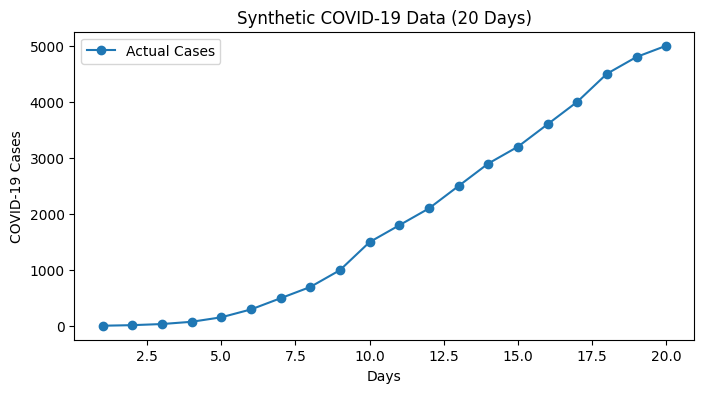

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2844
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2381  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1974 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1869 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2768 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2157 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2217 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2755 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2119 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1833 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1796 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2275 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1535 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1318  
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1174 
Epoch 16/100
5/5 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


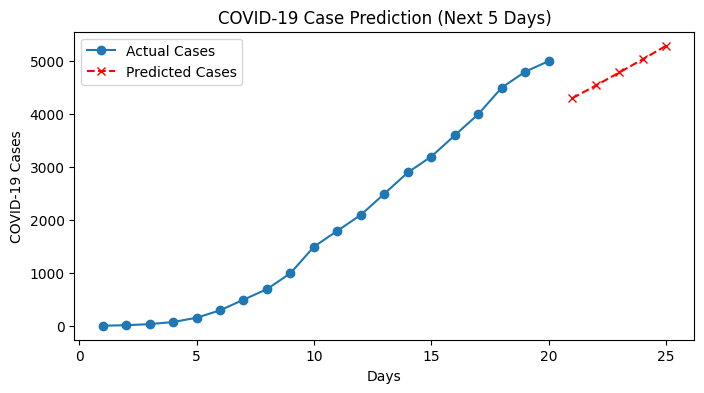

Predicted Cases on Day 21: 4298
Predicted Cases on Day 22: 4538
Predicted Cases on Day 23: 4783
Predicted Cases on Day 24: 5033
Predicted Cases on Day 25: 5288


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1️⃣ **Generate Synthetic Data (20 Days of COVID-19 Cases)**
days = np.arange(1, 21)  # Days 1 to 20
cases = np.array([10, 20, 40, 80, 160, 300, 500, 700, 1000, 1500,
                  1800, 2100, 2500, 2900, 3200, 3600, 4000, 4500, 4800, 5000])

# Convert to DataFrame
df = pd.DataFrame({"Day": days, "Cases": cases})

# 📊 **Plot Data**
plt.figure(figsize=(8, 4))
plt.plot(df["Day"], df["Cases"], marker="o", linestyle="-", label="Actual Cases")
plt.xlabel("Days")
plt.ylabel("COVID-19 Cases")
plt.title("Synthetic COVID-19 Data (20 Days)")
plt.legend()
plt.show()

# 2️⃣ **Data Preprocessing**
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Splitting Features and Target
X = df_scaled[:, 0].reshape(-1, 1, 1)  # Days as input (reshaped for LSTM)
y = df_scaled[:, 1]  # Cases as output

# 3️⃣ **Build LSTM Model**
model = Sequential([
    LSTM(50, activation="relu", input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# 4️⃣ **Train the Model**
model.fit(X, y, epochs=100, batch_size=4, verbose=1)

# 5️⃣ **Predict the Next 5 Days**
future_days = np.array([21, 22, 23, 24, 25]).reshape(-1, 1)
future_days_scaled = scaler.transform(np.hstack((future_days, np.zeros_like(future_days))))[:, 0].reshape(-1, 1, 1)
predicted_cases_scaled = model.predict(future_days_scaled)
predicted_cases = scaler.inverse_transform(np.hstack((future_days, predicted_cases_scaled)))[:, 1]

# 📈 **Plot Predictions**
plt.figure(figsize=(8, 4))
plt.plot(df["Day"], df["Cases"], marker="o", label="Actual Cases")
plt.plot(future_days, predicted_cases, marker="x", linestyle="dashed", color="red", label="Predicted Cases")
plt.xlabel("Days")
plt.ylabel("COVID-19 Cases")
plt.title("COVID-19 Case Prediction (Next 5 Days)")
plt.legend()
plt.show()

# 🔢 **Print Predictions**
for day, case in zip(future_days.flatten(), predicted_cases):
    print(f"Predicted Cases on Day {int(day)}: {int(case)}")
